In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", 100)

In [64]:
# gaussian fit for B0_MM gave [7120.25363303 5280.83662984   17.14504324]
# Therefore all the datapoints that are more than 3 sigma away from the mean can be considered to be background
sig = 17.15
mean = 5280.84
min_mass = mean - 3*sig
max_mass = mean + 3*sig
df = pd.read_pickle("total_dataset_f.pkl") # dataset filtered of peaking background
df = df.drop(["accept_kaon", "accept_muon", "accept_pion", "dilepton_mass"], axis = 1)
print(len(df))
bg = df[(df["B0_MM"] < min_mass) | (df["B0_MM"] > max_mass)] # far ends are mostly background
print(len(bg)) # bg - background

279138
59596


In [65]:
signal = pd.read_csv("sig.csv")
print(len(signal))


8802


In [66]:
vals = np.concatenate([np.zeros(len(bg)), np.ones(len(signal))])
print(len(vals))

68398


In [67]:
X = bg.append(signal)
#print(X.columns)
X = X.drop(["year", "polarity", "Unnamed: 0"], axis = 1)
#print(X.columns)
Y = vals

"""
nan = np.where(np.isnan(X))
print(len(nan[0]))
print(nan)
print(X.iloc[[nan[0][0]]])
"""

0
(array([], dtype=int64), array([], dtype=int64))


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


IndexError: index 0 is out of bounds for axis 0 with size 0

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, Y_train)

[Text(495.85183444795217, 400.6706896551724, 'K_MC15TuneV1_ProbNNmu <= -501.0\ngini = 0.09\nsamples = 137828\nvalue = [131281, 6547]\nclass = Bg'),
 Text(489.918130036554, 386.6120689655172, 'gini = 0.0\nsamples = 107118\nvalue = [107118, 0]\nclass = Bg'),
 Text(501.7855388593503, 386.6120689655172, 'B0_MM <= 5229.403\ngini = 0.335\nsamples = 30710\nvalue = [24163, 6547]\nclass = Bg'),
 Text(289.649087189499, 372.5534482758621, 'J_psi_MM <= 3704.644\ngini = 0.019\nsamples = 17930\nvalue = [17757, 173]\nclass = Bg'),
 Text(146.90264393121208, 358.4948275862069, 'J_psi_MM <= 2637.771\ngini = 0.012\nsamples = 17378\nvalue = [17270, 108]\nclass = Bg'),
 Text(84.5552878624242, 344.4362068965517, 'Kstar_MM <= 1071.249\ngini = 0.048\nsamples = 2728\nvalue = [2661, 67]\nclass = Bg'),
 Text(78.621583451026, 330.3775862068966, 'B0_MM <= 5170.065\ngini = 0.143\nsamples = 865\nvalue = [798, 67]\nclass = Bg'),
 Text(72.68787903962782, 316.3189655172414, 'gini = 0.0\nsamples = 517\nvalue = [517, 0]\

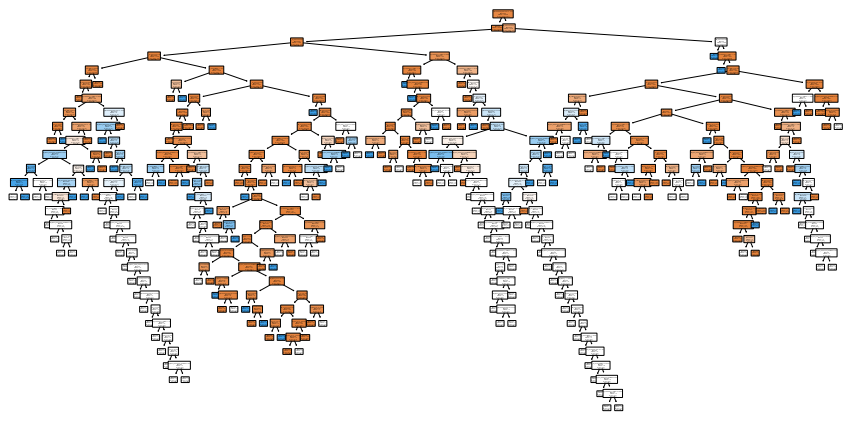

In [34]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["Bg", "Sig"],
         feature_names = X.columns)

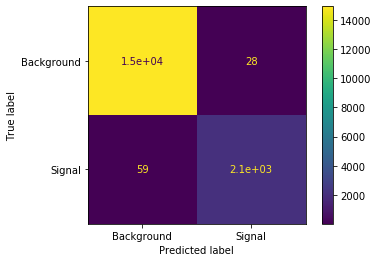

In [69]:
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels = ["Background", "Signal"])

In [71]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[15:-1]
print(ccp_alphas)

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)

[9.73242098e-06 9.73539959e-06 9.74696869e-06 9.74696869e-06
 9.74696869e-06 9.74696869e-06 1.16963624e-05 1.16963624e-05
 1.22982490e-05 1.29959583e-05 1.38623555e-05 1.39242410e-05
 1.45759090e-05 1.51619513e-05 1.51619513e-05 1.55377631e-05
 1.55951499e-05 1.59495851e-05 1.59495851e-05 1.64948701e-05
 1.67764720e-05 1.73279443e-05 1.87583171e-05 1.89524391e-05
 1.90615380e-05 1.91913973e-05 1.92621029e-05 1.95089906e-05
 2.16599304e-05 2.33664704e-05 2.55423649e-05 2.85549762e-05
 3.11902998e-05 3.24898956e-05 3.68355043e-05 3.68877396e-05
 3.71117279e-05 3.77145334e-05 3.79752027e-05 3.81812103e-05
 3.97562925e-05 4.38234233e-05 4.39278589e-05 4.80421182e-05
 4.81275095e-05 5.00295367e-05 5.05013516e-05 5.41498261e-05
 5.50115231e-05 6.59215274e-05 7.74649854e-05 9.28669517e-05
 9.56346995e-05 1.11595078e-04 1.24927723e-04 1.88245763e-04
 2.23709737e-04 2.45398140e-04 2.62050195e-04 2.74903199e-04
 2.93778178e-04 4.95997570e-04 6.46182865e-04 5.94611438e-02]


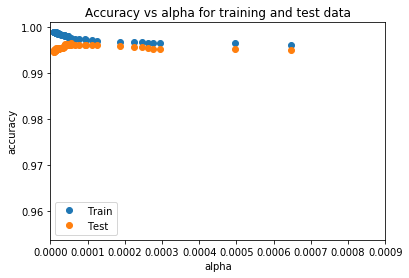

In [77]:
train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and test data")
ax.plot(ccp_alphas, train_scores, 'o', label = "Train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, 'o', label = "Test", drawstyle = "steps-post")
plt.legend()
plt.xlim(0.00, 0.0009)
plt.show()

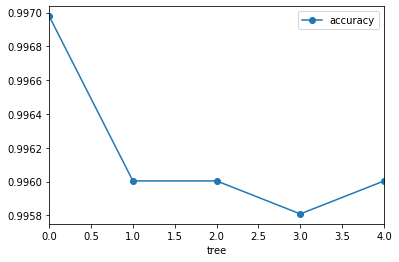

In [79]:
alpha = 0.001

clf_dt = DecisionTreeClassifier(ccp_alpha = alpha)
scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker = 'o')

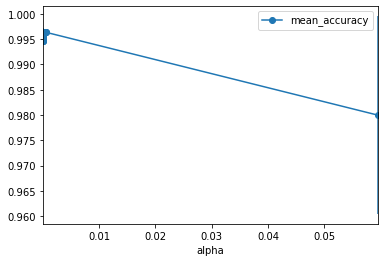

In [81]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns = ["alpha", "mean_accuracy", "std"])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')

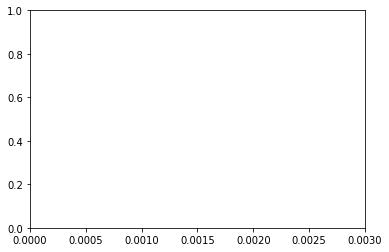

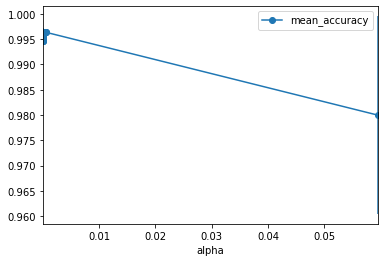

In [82]:

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')


In [83]:
ideal_alpha = ccp_alphas[-2]
print(ideal_alpha)




0.0006461828651550703


[Text(279.0, 356.7375, 'K_MC15TuneV1_ProbNNmu <= -501.0\ngini = 0.225\nsamples = 51298\nvalue = [44656, 6642]\nclass = Bg'),
 Text(139.5, 254.8125, 'gini = 0.0\nsamples = 31506\nvalue = [31506, 0]\nclass = Bg'),
 Text(418.5, 254.8125, 'B0_MM <= 5229.403\ngini = 0.446\nsamples = 19792\nvalue = [13150, 6642]\nclass = Bg'),
 Text(279.0, 152.8875, 'gini = 0.026\nsamples = 11229\nvalue = [11079, 150]\nclass = Bg'),
 Text(558.0, 152.8875, 'B0_MM <= 5331.941\ngini = 0.367\nsamples = 8563\nvalue = [2071, 6492]\nclass = Sig'),
 Text(418.5, 50.96249999999998, 'gini = 0.0\nsamples = 6446\nvalue = [0, 6446]\nclass = Sig'),
 Text(697.5, 50.96249999999998, 'gini = 0.043\nsamples = 2117\nvalue = [2071, 46]\nclass = Bg')]

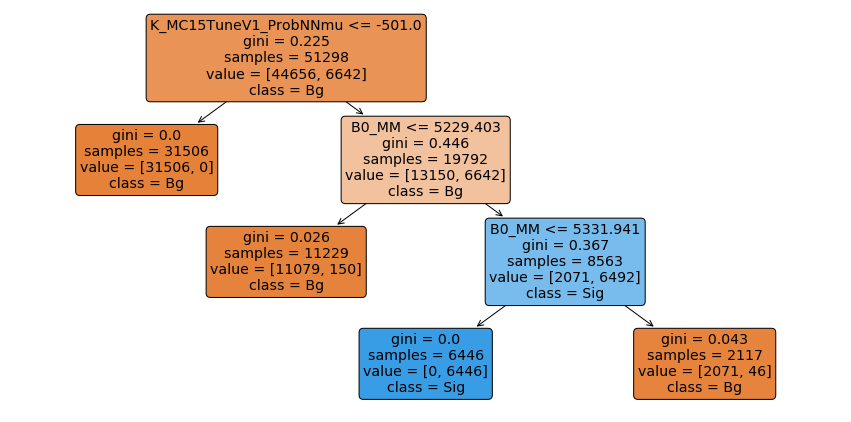

In [84]:
clf_dt = DecisionTreeClassifier(ccp_alpha = ideal_alpha)
clf_dt = clf_dt.fit(X_train, Y_train)

plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["Bg", "Sig"],
         feature_names = X.columns)


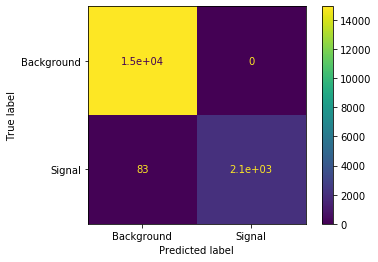

In [85]:
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels = ["Background", "Signal"])

In [93]:
df = pd.read_pickle("total_dataset_f.pkl")
df = df.drop(["accept_kaon", "accept_muon", "accept_pion", "dilepton_mass"], axis = 1)
print(len(df))
total_data = df[(df["B0_MM"] > min_mass) & (df["B0_MM"] < max_mass)].drop(["year", "polarity", "Unnamed: 0"], axis = 1)
print(len(total_data))

279138
219542


In [94]:
result = clf_dt.predict(total_data)

In [95]:
print(result)
print(len(result))

[0. 0. 0. ... 0. 0. 0.]
219542


(array([218125.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

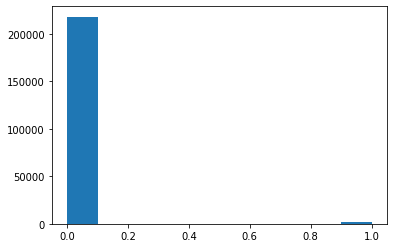

In [96]:
plt.hist(result)

In [97]:
total_data["Result"] = result
filtered = total_data[total_data["Result"] == 1]
filtered.to_pickle("Filtered_data.pkl")

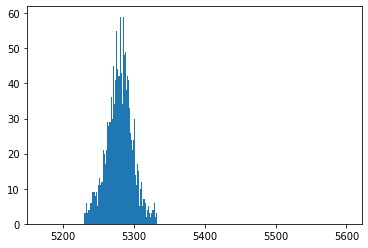

In [98]:
plt.hist(filtered['B0_MM'], range=[5170, 5600], bins=300, zorder=1)
plt.show()